# Purity Value Analysis

First select which data set you would like to analyze.

In [15]:
import ipywidgets as widgets
from glob import glob
from os.path import basename, splitext

datasets = [basename(x) for x in glob("PurityData/*")]
w = widgets.Dropdown(
    options=datasets,
    description='Data Set:',
)
display(w)

Dropdown(description=u'Data Set:', options=('TimeStep', 'NewFragments', 'Single', 'Size'), value='TimeStep')

## Extract the Purity Values

In [24]:
dataset = w.value
filelist = []
for f in glob("PurityData/"+dataset+"/*.yaml"):
    filelist.append(splitext(basename(f))[0])

In [25]:
from yaml import load
from numpy import array

prog = widgets.IntProgress(
    max=len(filelist),
    description='Loading:',
)
display(prog)

key_values = []
purity_values = []

for f in filelist:
    logfile = f+".yaml"
    key_values.append(logfile)
    val = []
    with open("PurityData/"+dataset+"/"+logfile) as ifile:
        values = load(ifile)
        for frag in values["Fragment multipoles"]:
            purity = frag["Purity indicator"]
            val.append(purity)
    purity_values.append(array(val))
    prog.value += 1
prog.bar_style="success"
prog.description="Finished"

IntProgress(value=0, description=u'Loading:', max=1)

## Analysis

First we'll plot a sorted list of purity values for each of the different data sets.

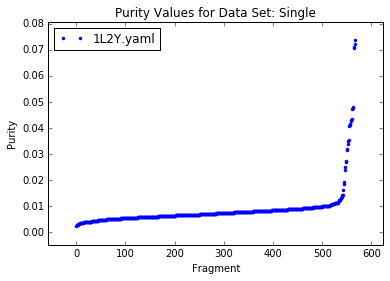

In [26]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(1,1)
ax.set_xlabel("Fragment")
ax.set_ylabel("Purity")

plt.title("Purity Values for Data Set: "+ w.value)

for i in range(0, len(filelist)):
    plt.plot(sorted(abs(purity_values[i])), '.', label=key_values[i])
    
plt.legend(loc="best")
plt.margins(x=0.1, y=0.1)
plt.show()

Next, we'll break down the data into the protein, the water molecules, and the ions in solution.

In [27]:
protein_purity_values = []
na_purity_values = []
cl_purity_values = []
h2o_purity_values = []

prog2 = widgets.IntProgress(
    max=len(filelist),
    description='Loading:',
)
display(prog2)

for i in range(0, len(filelist)):
    logfile = filelist[i]+".yaml"
    valh2o = []
    valprotein = []
    valcl = []
    valna = []
    with open("PurityData/"+dataset+"/"+logfile) as ifile:
        values = load(ifile)
        for frag in values["Fragment multipoles"]:
            name = frag["Atom names"]
            purity = frag["Purity indicator"]
            if 'Na' in name:
                valna.append(purity)
            elif 'Cl' in name:
                valcl.append(purity)
            elif 'N' in name or 'C' in name:
                valprotein.append(purity)
            else:
                valh2o.append(purity)
    h2o_purity_values.append(array(valh2o))
    protein_purity_values.append(array(valprotein))
    cl_purity_values.append(array(valcl))
    na_purity_values.append(array(valna))
    prog2.value += 1
    
prog2.bar_style="success"
prog2.description="Finished"

IntProgress(value=0, description=u'Loading:', max=1)

And now plot that data side by side.

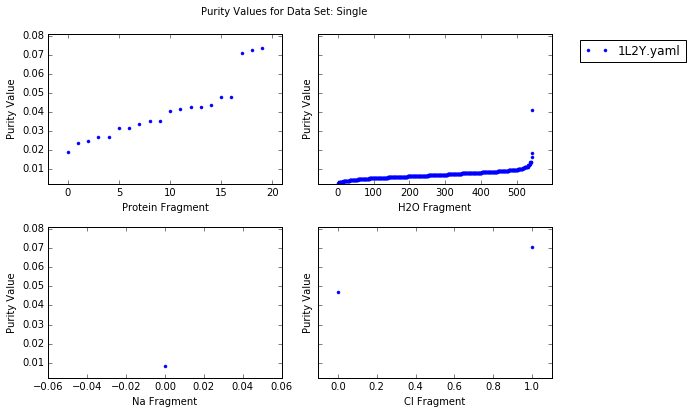

In [28]:
from numpy import nditer, abs
fig, ax= plt.subplots(2,2, figsize=(8,6), sharex=False, sharey=True)

ymin = min([min(x) for x in [abs(x) for x in purity_values]])/1.1
ymax = max([max(x) for x in [abs(x) for x in purity_values]])*1.1

for axis in ax.reshape(-1):
    axis.set_ylabel("Purity Value")
    axis.set_ylim(ymin, ymax)
    axis.margins(x=0.1,y=0.1)
ax[0,0].set_xlabel("Protein Fragment")
for i in range(0, len(filelist)):
    ax[0,0].plot(sorted(abs(protein_purity_values[i])), '.', label=key_values[i])
ax[0,1].set_xlabel("H2O Fragment")
for i in range(0, len(filelist)):
    ax[0,1].plot(sorted(abs(h2o_purity_values[i])), '.', label=key_values[i])
ax[1,0].set_xlabel("Na Fragment")
for i in range(0, len(filelist)):
    ax[1,0].plot(sorted(abs(na_purity_values[i])), '.', label=key_values[i])
ax[1,1].set_xlabel("Cl Fragment")
for i in range(0, len(filelist)):
    ax[1,1].plot(sorted(abs(cl_purity_values[i])), '.', label=key_values[i])

ax[0,1].legend(bbox_to_anchor=(1.6,1))
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("Purity Values for Data Set: "+ w.value)

plt.show()